In [52]:
import sys
sys.path.insert(0, "/Users/aimachine/PyImage/utils")
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import os
from tifffile import imread
from scipy.fftpack import fft
from matplotlib.colors import LogNorm
from Normalize import normalizeFloat, normalizeMinMax, Path, save_tiff_imagej_compatible

In [53]:
targetdir = '/Users/aimachine/Documents/JLMCurvature/FFTImageTest/'
sourceimage = '/Users/aimachine/Documents/JLMCurvature/FFTImageTest/HalfResolution.tif'
y = imread(sourceimage)
base = os.path.split(sourceimage)[-1]

Filename = os.path.splitext(base)


In [54]:
#Enter time unit in seconds
Time_unit = 1.0 / 5.0
#Enter start y pixel unit for the section
StartSection = 0
#Enter end y pixel unit for section
EndSection = 100


375   122


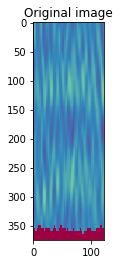

In [55]:
plt.figure()
plt.imshow(y, plt.cm.Spectral)
plt.title('Original image')
Xrange = y.shape[0]
Yrange = y.shape[1]
print(Xrange, " ", Yrange)
width = int(EndSection - StartSection)
block = int(Xrange / width)
x = np.linspace(0.0, width*Time_unit, width)
xf = np.linspace(0.0, 1.0/(2.0*Time_unit), int(width/2))


In [58]:
# Show the results

def doFFT(image, block):
   addedfft = 0 
   for i in range(image.shape[0]):
    
      strip = image[i,:]
      fftresult = fft(strip)
      addedfft += np.abs(fftresult)  
   addedfft/=image.shape[0]
   plt.figure()
  
   plt.semilogy(xf[1:int(width/2)], 2.0/width * (addedfft[1:int(width/2)]), '-b')
   plt.grid()
   plt.savefig(targetdir + Filename[0] + str(block) + '.png')

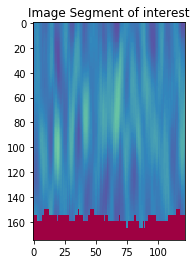

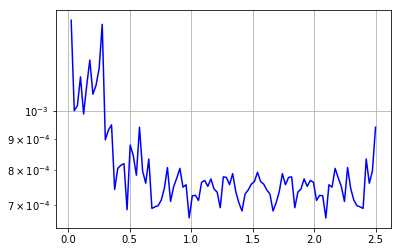

In [59]:

for i in range(block):
 plt.figure()
 smally = y[StartSection:EndSection, :]
 plt.imshow(smally, plt.cm.Spectral)
 plt.title('Image Segment of interest')
 StartSection = EndSection
 EndSection += width    
 doFFT(smally, i)